In [2]:
import os
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt

In [8]:
if os.path.exists('./dataset'):
    print('파일 존재함')
else:
    os.mkdir('./dataset')
    os.mkdir('./dataset/cat')
    os.mkdir('./dataset/dog')

파일 존재함


In [9]:
for i in os.listdir('./train/'):
    if 'cat' in i:
        shutil.move('./train/' + i, './dataset/cat/' + i)
    elif 'dog' in i:
        shutil.move('./train/' + i, './dataset/dog/' + i)
os.rmdir('./train')

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/',
    image_size=(64, 64),
    batch_size=64,
    subset='training',
    validation_split=0.2,
    seed=1234
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/',
    image_size=(64, 64),
    batch_size=64,
    subset='validation',
    validation_split=0.2,
    seed=1234
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


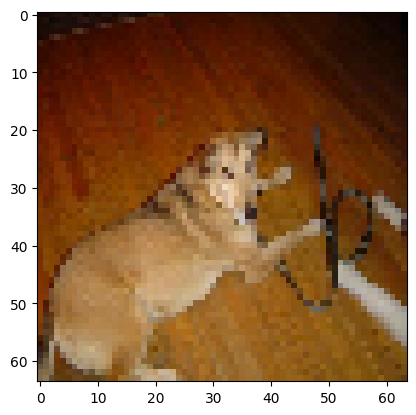

In [4]:
for i, correct in train_ds.take(1):
    plt.imshow(i[0].numpy().astype('uint8'))
    plt.show()

In [5]:
def datasetting(i, correct):
    i = tf.cast(i / 255.0, tf.float32)
    return i, correct

train_ds = train_ds.map(datasetting)
val_ds = val_ds.map(datasetting)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       7